# CrossMetabolicPathways

Requirements:
* pandas

In [1]:
import pandas as pd
import requests

In [2]:
df = pd.read_csv("../data/Bacteria.tsv", sep='\t', skiprows=1)
df

,ID,proteína,bacteria,pvalue,log2FoldChange
0,SEQF1078_00060,Elongation factor Tu,Fusobacterium nucleatum,1.123520e-04,6.000000e+09
1,SEQF1160_00952,Elongation factor Tu,Fusobacterium periodonticum,1.123520e-04,6.000000e+09
2,SEQF2067_00702,Elongation factor Tu,Fusobacterium nucleatum,1.123520e-04,6.000000e+09
3,SEQF2555_02146,Elongation factor Tu,Fusobacterium periodonticum,1.123520e-04,6.000000e+09
4,SEQF2821_00166,Elongation factor Tu,Fusobacterium nucleatum,1.123520e-04,6.000000e+09
...,...,...,...,...,...
1873,SEQF2812_01596,NAD-specific glutamate dehydrogenase,Fusobacterium nucleatum,8.080000e-11,8.000000e+08
1874,SEQF2816_00970,NAD-specific glutamate dehydrogenase,Fusobacterium nucleatum,8.350000e-10,7.000000e+08
1875,SEQF2843_00390,NAD-specific glutamate dehydrogenase,Fusobacterium hwasookii,8.350000e-10,7.000000e+08
1876,SEQF3018_01721,Enolase,Fusobacterium nucleatum,8.990000e-05,4.000000e+09


In [37]:
# Rename columns
df.rename(columns = {'proteína':'GeneNames','log2FoldChange':'log2FC','pvalue':'p-value'}, inplace = True)
# Drop NaN to perform the plots
df.dropna(subset = ['log2FC','p-value'], inplace=True)

In [47]:
print(df['p-value'].mean())
print(df['log2FC'].mean())

0.36991673981522866
2634583599.5625296


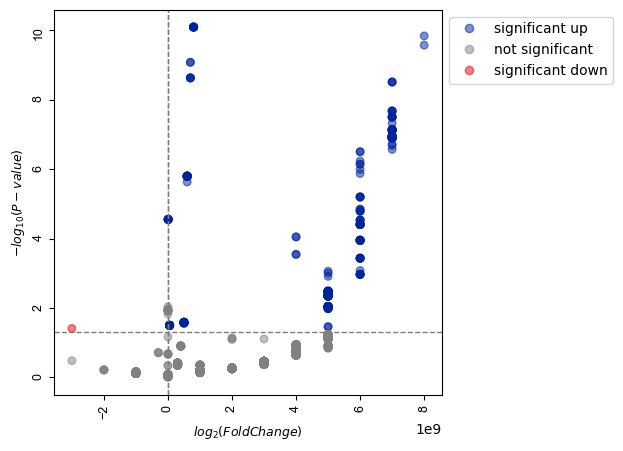

In [48]:
from bioinfokit import analys, visuz
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(2, 4), pv_thr=(0.05, 0.05), 
    color=("#00239CFF", "grey", "#E10600FF"), valpha=0.5, plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1), dotsize=30, gstyle=2, sign_line=True,
                            #geneid="GeneNames",  genenames=({"ALB":"ALB"}),
                        show=True)

# Obtain the Uniprot Codes
* https://www.uniprot.org/help/api_queries

In [28]:
def get_spcode(organism, protein):
    search_url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=false&format=tsv&query=(reviewed:true)%20AND%28organism_name%3A"{0}"%29+AND+"{1}"'.format(
        organism, protein)
    response = requests.get(search_url)
    texto = response.text
    texto = [x for x in texto.split("\n")][1]
    texto = texto.split('\t')
    texto.append("Review")
    
    if len(texto) == 8:
        return texto
    else:
        pass
    
    if len(texto) < 3:
        search_url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=false&format=tsv&query=(reviewed:false)%20AND%28organism_name%3A"{0}"%29+AND+"{1}"'.format(
        organism, protein)
        response = requests.get(search_url)
        texto = response.text
        texto = [x for x in texto.split("\n")][1]
        texto = texto.split('\t')
        texto.append("UnReview")
        if len(texto) == 8:
            return texto
    
    if len(texto) < 3:
        search_url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=false&format=tsv&query=(reviewed:false)%20AND%28organism_name%3A"{0}"%29+AND+"{1}"'.format(
        "Escherichia coli", protein)
        response = requests.get(search_url)
        texto = response.text
        texto = [x for x in texto.split("\n")][1]
        texto = texto.split('\t')
        texto.append("Ecoli")
        if len(texto) == 8:
            return texto
        
    if len(texto) < 3:
        search_url = 'https://rest.uniprot.org/uniprotkb/stream?compressed=false&format=tsv&query=(reviewed:false)%20AND%28organism_name%3A"{0}"%29+AND+"{1}"'.format(
        "Pseudomonas aeruginosa", protein)
        response = requests.get(search_url)
        texto = response.text
        texto = [x for x in texto.split("\n")][1]
        texto = texto.split('\t')
        texto.append("Paeruginosa")
        if len(texto) == 8:
            return texto
        else:
            return ["NA","NA","NA","NA","NA","NA","NA","NA"]

In [21]:
organisms = df['bacteria'].to_list()
proteins  = df['proteína'].to_list()

In [30]:
df2 = pd.DataFrame(columns=['SP_code','Entry_name','Review_status','Protein_name','Gene_name','Organism','Protein_len','Searching'])
for i in range(len(organisms)):
    texto = get_spcode(organisms[i], proteins[i])
    print (texto)
    df2.loc[i] = texto

['Q8R603', 'EFTU_FUSNN', 'reviewed', 'Elongation factor Tu (EF-Tu)', 'tuf FN1555', 'Fusobacterium nucleatum subsp. nucleatum (strain ATCC 25586 / DSM 15643 / BCRC 10681 / CIP 101130 / JCM 8532 / KCTC 2640 / LMG 13131 / VPI 4355)', '394', 'Review']
['A0A095WGX7', 'A0A095WGX7_9FUSO', 'unreviewed', 'Elongation factor Tu (EF-Tu)', 'tuf FSAG_002058', 'Fusobacterium periodonticum 2_1_31', '394', 'UnReview']
['Q8R603', 'EFTU_FUSNN', 'reviewed', 'Elongation factor Tu (EF-Tu)', 'tuf FN1555', 'Fusobacterium nucleatum subsp. nucleatum (strain ATCC 25586 / DSM 15643 / BCRC 10681 / CIP 101130 / JCM 8532 / KCTC 2640 / LMG 13131 / VPI 4355)', '394', 'Review']
['A0A095WGX7', 'A0A095WGX7_9FUSO', 'unreviewed', 'Elongation factor Tu (EF-Tu)', 'tuf FSAG_002058', 'Fusobacterium periodonticum 2_1_31', '394', 'UnReview']
['Q8R603', 'EFTU_FUSNN', 'reviewed', 'Elongation factor Tu (EF-Tu)', 'tuf FN1555', 'Fusobacterium nucleatum subsp. nucleatum (strain ATCC 25586 / DSM 15643 / BCRC 10681 / CIP 101130 / JCM 85

In [31]:
len(df2['SP_code'].unique())

302

In [32]:
df3 = pd.concat([df,df2], axis=1)
df3.head()

,ID,proteína,bacteria,pvalue,log2FoldChange,SP_code,Entry_name,Review_status,Protein_name,Gene_name,Organism,Protein_len,Searching
0,SEQF1078_00060,Elongation factor Tu,Fusobacterium nucleatum,0.000112,6.000000e+09,Q8R603,EFTU_FUSNN,reviewed,Elongation factor Tu (EF-Tu),tuf FN1555,Fusobacterium nucleatum subsp. nucleatum (stra...,394,Review
1,SEQF1160_00952,Elongation factor Tu,Fusobacterium periodonticum,0.000112,6.000000e+09,A0A095WGX7,A0A095WGX7_9FUSO,unreviewed,Elongation factor Tu (EF-Tu),tuf FSAG_002058,Fusobacterium periodonticum 2_1_31,394,UnReview
2,SEQF2067_00702,Elongation factor Tu,Fusobacterium nucleatum,0.000112,6.000000e+09,Q8R603,EFTU_FUSNN,reviewed,Elongation factor Tu (EF-Tu),tuf FN1555,Fusobacterium nucleatum subsp. nucleatum (stra...,394,Review
3,SEQF2555_02146,Elongation factor Tu,Fusobacterium periodonticum,0.000112,6.000000e+09,A0A095WGX7,A0A095WGX7_9FUSO,unreviewed,Elongation factor Tu (EF-Tu),tuf FSAG_002058,Fusobacterium periodonticum 2_1_31,394,UnReview
4,SEQF2821_00166,Elongation factor Tu,Fusobacterium nucleatum,0.000112,6.000000e+09,Q8R603,EFTU_FUSNN,reviewed,Elongation factor Tu (EF-Tu),tuf FN1555,Fusobacterium nucleatum subsp. nucleatum (stra...,394,Review


In [33]:
# Save annoted with SP proteins
df3.to_csv("../run/bacteria/proteomic_spv2.csv", sep='\t')

In [49]:
notfound = df3.loc[df3["SP_code"]=='NA']['proteína'].unique()

In [50]:
df3.loc[df3["SP_code"]=='NA']['bacteria'].unique()

array(['Prevotella histicola', 'Fusobacterium nucleatum',
       'Fusobacterium periodonticum', 'Fusobacterium hwasookii',
       'Fusobacterium sp.', 'Anaerolinea thermophila',
       'Caldilinea aerophila', 'Chlorobium limicola', 'WPS-2 G-1 sp.',
       'Segetibacter aerophilus', 'Fusobacterium necrophorum',
       'Fusobacterium gonidiaformans', 'Campylobacter sputorum',
       'Peptoniphilus harei', 'Peptoniphilus sp.',
       'Peptoniphilus asaccharolyticus', 'Arthrospira platensis paraca',
       'Enterococcus italicus', 'Anoxybacillus flavithermus',
       'Staphylococcus pettenkoferi', 'Cardiobacterium valvarum',
       'Selenomonas artemidis'], dtype=object)

In [51]:
notfound

array(['Purine nucleoside phosphorylase 1',
       'Caffeyl-CoA reductase-Etf complex subunit CarE',
       'Tryptophanase 1', 'Glutaconate CoA-transferase subunit A',
       'Glutaconate CoA-transferase subunit B', 'Chaperone protein dnaK2',
       '3-aminobutyryl-CoA ammonia lyase', 'Iron uptake protein A1',
       'Putative 2-aminoethylphosphonate-binding periplasmic protein',
       'Glyceraldehyde-3-phosphate dehydrogenase 1',
       'Bifunctional PGK/TIM', 'Phenyllactate dehydrogenase',
       'Tryptophanase 2',
       'High-affinity zinc uptake system binding-protein ZnuA',
       'NAD(P)-dependent benzaldehyde dehydrogenase',
       'Glutathione amide reductase',
       'ATP-dependent zinc metalloprotease FtsH 2'], dtype=object)

# 2. Read from csv

In [2]:
import pandas as pd
df4 = pd.read_csv("../run/bacteria/proteomic_spv2.csv", sep='\t')
df4.head(3)

,Unnamed: 0,ID,proteína,bacteria,pvalue,log2FoldChange,SP_code,Entry_name,Review_status,Protein_name,Gene_name,Organism,Protein_len,Searching
0,0,SEQF1078_00060,Elongation factor Tu,Fusobacterium nucleatum,0.000112,6.000000e+09,Q8R603,EFTU_FUSNN,reviewed,Elongation factor Tu (EF-Tu),tuf FN1555,Fusobacterium nucleatum subsp. nucleatum (stra...,394.0,Review
1,1,SEQF1160_00952,Elongation factor Tu,Fusobacterium periodonticum,0.000112,6.000000e+09,A0A095WGX7,A0A095WGX7_9FUSO,unreviewed,Elongation factor Tu (EF-Tu),tuf FSAG_002058,Fusobacterium periodonticum 2_1_31,394.0,UnReview
2,2,SEQF2067_00702,Elongation factor Tu,Fusobacterium nucleatum,0.000112,6.000000e+09,Q8R603,EFTU_FUSNN,reviewed,Elongation factor Tu (EF-Tu),tuf FN1555,Fusobacterium nucleatum subsp. nucleatum (stra...,394.0,Review


In [8]:
print(df4.shape)
df4.dropna(subset='Searching').shape

(1878, 14)


(1738, 14)

In [9]:
1738/1878

0.9254526091586794

In [55]:
# Get http://geneontology.org/ontology/go-basic.obo
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

  EXISTS: go-basic.obo


In [56]:
# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
from goatools.base import download_ncbi_associations
gene2go = download_ncbi_associations()

  EXISTS: gene2go


In [57]:
# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
from goatools.base import download_ncbi_associations
file_gene2go = download_ncbi_associations()

  EXISTS: gene2go


In [59]:
from __future__ import print_function
from goatools.associations import read_ncbi_gene2go

geneid2gos_coli = read_ncbi_gene2go("gene2go", taxids=[562])

print("{N:,} annotated coli genes".format(N=len(geneid2gos_coli)))

DEPRECATED read_ncbi_gene2go: USE Gene2GoReader FROM goatools.anno.genetogo_reader
DEPRECATED read_ncbi_gene2go CALLED FROM: /var/folders/6w/mwnbmyr54kd5krf6hr996f0c0000gn/T/ipykernel_81317/1954143031.py BY <module>
HMS:0:00:00.855145       0 annotations,      0 genes,      0 GOs, 0 taxids READ: gene2go 


AssertionError: **FATAL: NO TAXIDS: gene2go

In [58]:
from __future__ import print_function
from goatools.anno.genetogo_reader import Gene2GoReader

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(file_gene2go, taxids=[562])

# Get associations for each branch of the GO DAG (BP, MF, CC)
ns2assoc = objanno.get_ns2assc()

for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated human genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:00.916732       0 annotations,      0 genes,      0 GOs, 0 taxids READ: gene2go 


AssertionError: **FATAL: NO TAXIDS: gene2go